In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

### Flights DataFrame

In [63]:
flights_df_2018 = pd.read_csv('./Data/flights/y/flight_2018.csv')

C:\Users\furqa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
flights_df_2019 = pd.read_csv('./Data/flights/y/flight_2019.csv')

In [175]:
flights_test = pd.read_csv('./Data/flights_test/flights_test.csv')

In [198]:
flights_test.shape

(660556, 21)

In [176]:
feat = flights_test.columns.values.tolist()
feat.append('arr_delay')

In [90]:
flights_2019 = flights_df_2019[feat]

In [91]:
flights_2018 = flights_df_2018[feat]

In [92]:
flights_df = pd.concat([flights_2018,flights_2019], ignore_index=True)

In [93]:
flights_df = flights_df.drop(['Unnamed: 0'], axis=1)

In [75]:
#flights_df.to_csv('flights_df.csv')

### Fuel Consumption DataFrame

In [21]:
# fuel consumption dfs
fuel_df_2018 = pd.read_csv('./Data/fuel_consumption/y/fuel_consumption_2018.csv')
fuel_df_2019 = pd.read_csv('./Data/fuel_consumption/y/fuel_consumption_2019.csv')
fuel_df = pd.concat([fuel_df_2018, fuel_df_2019], ignore_index=True)
fuel_df = fuel_df.drop(['Unnamed: 0'], axis=1)

In [23]:
fuel_df.head(1)

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,21161.0,09Q,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1504939.0,2703344.0,4208283.0,2018


### Passengers DataFrame

In [211]:
passengers_df_2018 = pd.read_csv('./Data/passengers/y/passengers_2018.csv')
passengers_df_2019 = pd.read_csv('./Data/passengers/y/passengers_2019.csv')
passengers_df = pd.concat([passengers_df_2018,passengers_df_2019], ignore_index=True)
passengers_df = passengers_df.drop(['Unnamed: 0'], axis =1)

In [212]:
passengers_df.head(1)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,12.0,12.0,755399.0,0.0,0.0,517897.0,0.0,691.0,1458.0,1169.0,FX,20107,Federal Express Corporation,D,FX,Federal Express Corporation,3,3,13244,33244,MEM,"Memphis, TN",US,United States,11775,31775,FSD,"Sioux Falls, SD",US,United States,6,622,2,2018,12,2,G,DU


# Exploration

In [94]:
flights_df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay
0,2018-05-01,WN,WN,WN,638,WN,N7747C,638,10397,ATL,...,11433,DTW,"Detroit, MI",825,1025,N,120.0,1.0,594.0,-9.0
1,2018-05-01,UA,UA_CODESHARE,UA,4062,EV,N10575,4062,12278,ICT,...,13930,ORD,"Chicago, IL",1450,1648,N,118.0,1.0,588.0,-20.0


In [72]:
from datetime import datetime

In [95]:
flights_df['fl_date'] = flights_df.fl_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [96]:
flights_df['year'] = flights_df.fl_date.apply(lambda x: x.year)
flights_df['month'] = flights_df.fl_date.apply(lambda x: x.month)
flights_df['day'] = flights_df.fl_date.apply(lambda x: x.day)

In [97]:
flights_df.columns.values

array(['fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin',
       'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name',
       'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time',
       'flights', 'distance', 'arr_delay', 'year', 'month', 'day'],
      dtype=object)

In [98]:
flights_df.to_csv('flights_df.csv')

In [78]:
# full data set is taking too long, will continue with sample 
flights_df[flights_df['fl_date'] 

### Going to use only Jan 2019 Data

In [177]:
flights_2019_01 = pd.read_csv('./Data/flights/y_m/flights_2019_01.csv')

In [222]:
flights_2019_01

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,NaN,NaN,NaN,NaN,NaN,NaN,1304,NaN,NaN,1.0,B,0.0,N,72.0,NaN,NaN,1.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,AA,AA_CODESHARE,AA,3680,MQ,N248NN,3680,14027,PBI,"West Palm Beach/Palm Beach, FL",11278,DCA,"Washington, DC",1450,NaN,NaN,NaN,NaN,NaN,NaN,1717,NaN,NaN,1.0,A,0.0,N,147.0,NaN,NaN,1.0,857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-01,AA,AA_CODESHARE,AA,5621,OH,N720PS,5621,11057,CLT,"Charlotte, NC",13360,MLB,"Melbourne, FL",1140,1139.0,-1.0,30.0,1209.0,1325.0,3.0,1328,1328.0,0.0,0.0,NaN,0.0,N,108.0,109.0,76.0,1.0,490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,"Myrtle Beach, SC",11057,CLT,"Charlotte, NC",2157,2158.0,1.0,10.0,2208.0,2248.0,20.0,2311,2308.0,-3.0,0.0,NaN,0.0,N,74.0,70.0,40.0,1.0,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,"Hartford, CT",11278,DCA,"Washington, DC",1151,1212.0,21.0,7.0,1219.0,1328.0,3.0,1325,1331.0,6.0,0.0,NaN,0.0,N,94.0,79.0,69.0,1.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638644,638644,2019-01-28,WN,WN,WN,594,WN,NaN,594,11042,CLE,"Cleveland, OH",12889,LAS,"Las Vegas, NV",630,NaN,NaN,NaN,NaN,NaN,NaN,830,NaN,NaN,1.0,B,0.0,N,300.0,NaN,NaN,1.0,1824.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638645,638645,2019-01-28,WN,WN,WN,451,WN,N8323C,451,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",1715,1714.0,-1.0,8.0,1722.0,1716.0,7.0,1735,1723.0,-12.0,0.0,NaN,0.0,N,80.0,69.0,54.0,1.0,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638646,638646,2019-01-28,WN,WN,WN,855,WN,N7843A,855,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",1110,NaN,NaN,NaN,NaN,NaN,NaN,1135,NaN,NaN,1.0,B,0.0,N,85.0,NaN,NaN,1.0,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638647,638647,2019-01-28,WN,WN,WN,938,WN,N271LV,938,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",715,716.0,1.0,9.0,725.0,727.0,9.0,745,736.0,-9.0,0.0,NaN,0.0,N,90.0,80.0,62.0,1.0,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
f_df = flights_2019_01[feat]

In [13]:
f_df = f_df.drop(['Unnamed: 0'],axis=1)

In [206]:
f_df.fl_date.value_counts()

2019-01-02    22311
2019-01-11    21934
2019-01-25    21889
2019-01-18    21858
2019-01-07    21851
2019-01-10    21823
2019-01-31    21802
2019-01-24    21801
2019-01-17    21800
2019-01-14    21781
2019-01-28    21772
2019-01-04    21439
2019-01-03    21384
2019-01-21    21312
2019-01-06    21284
2019-01-09    21020
2019-01-30    20889
2019-01-23    20886
2019-01-16    20881
2019-01-08    20566
2019-01-29    20411
2019-01-22    20407
2019-01-15    20402
2019-01-27    20306
2019-01-13    20300
2019-01-01    19683
2019-01-05    18533
2019-01-20    18454
2019-01-12    16773
2019-01-26    16727
2019-01-19    16370
Name: fl_date, dtype: int64

In [205]:
f_df.shape

(638649, 21)

In [107]:
f_df.columns.values

array(['fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin',
       'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name',
       'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time',
       'flights', 'distance', 'arr_delay'], dtype=object)

In [279]:
f_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN
1,2019-01-03,AA,AA_CODESHARE,AA,3680,MQ,N248NN,3680,14027,PBI,"West Palm Beach/Palm Beach, FL",11278,DCA,"Washington, DC",1450,1717,N,147.0,1.0,857.0,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5621,OH,N720PS,5621,11057,CLT,"Charlotte, NC",13360,MLB,"Melbourne, FL",1140,1328,N,108.0,1.0,490.0,0.0
3,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,"Myrtle Beach, SC",11057,CLT,"Charlotte, NC",2157,2311,N,74.0,1.0,157.0,-3.0
4,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,"Hartford, CT",11278,DCA,"Washington, DC",1151,1325,N,94.0,1.0,313.0,6.0


dtype('O')

### Import Weather Data

In [20]:
weather_df = pd.read_csv('weather_df_clean.csv')

In [22]:
weather_df = weather_df.drop(['Unnamed: 0'],axis=1)

In [37]:
weather_df = weather_df.rename(columns={'dest_city_name': 'origin_city_name', 'Date':'fl_date'})

In [223]:
weather_df

,origin_city_name,fl_date,Type_Mode,Severity_Mode
0,"Saguache, CO",2019-01-01,Snow,Light
1,"Saguache, CO",2019-01-02,Snow,Light
2,"Saguache, CO",2019-01-03,Cold,Severe
3,"Saguache, CO",2019-01-03,Cold,Severe
4,"Saguache, CO",2019-01-03,Cold,Severe
...,...,...,...,...
121445,"Lander, WY",2019-01-28,Snow,Light
121446,"Lander, WY",2019-01-28,Snow,Light
121447,"Lander, WY",2019-01-28,Snow,Light
121448,"Lander, WY",2019-01-28,Snow,Light


In [208]:
weather_df.fl_date.value_counts()

2019-01-24    7994
2019-01-19    6875
2019-01-23    6655
2019-01-20    6593
2019-01-12    5191
2019-01-18    5038
2019-01-03    4964
2019-01-29    4931
2019-01-01    4842
2019-01-17    4723
2019-01-28    4512
2019-01-13    4391
2019-01-04    3841
2019-01-27    3723
2019-01-02    3562
2019-01-07    3556
2019-01-16    3412
2019-01-09    3302
2019-01-30    3290
2019-01-21    3180
2019-01-22    3127
2019-01-08    3019
2019-01-06    3005
2019-01-05    2953
2019-01-26    2854
2019-01-11    2578
2019-01-25    2484
2019-01-15    2427
2019-01-10    2319
2019-01-14    2108
2019-01-31       1
Name: fl_date, dtype: int64

### Merge Attempt 

In [263]:
wdf2 = pd.read_csv('merge_try.csv')
wdf2 = wdf2.drop(['Unnamed: 0'],axis=1)

In [266]:
fff = f_df.copy()

In [267]:
fff.shape

(638649, 21)

In [269]:
wfwf = fff.merge(wdf2, how='left', on=['fl_date','origin_city_name'])

In [271]:
wfwf.isna().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                4685
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
crs_arr_time               0
dup                        0
crs_elapsed_time           8
flights                    0
distance                   0
arr_delay              21000
Type_Mode             383493
dtype: int64

In [274]:
wfwf2 = wfwf.dropna(subset=['Type_Mode'])

In [280]:
wfwf2.head(3)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,Type_Mode
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain
3,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,"Myrtle Beach, SC",11057,CLT,"Charlotte, NC",2157,2311,N,74.0,1.0,157.0,-3.0,Fog
4,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,"Hartford, CT",11278,DCA,"Washington, DC",1151,1325,N,94.0,1.0,313.0,6.0,Rain


In [278]:
wfwf2.to_csv('weather_shiv.csv')

# The Following Lines of Codes are No Longer Applicable (Early Draft) -IGNORE

In [218]:
fl_df = f_df.copy()
w_df = weather_df.copy()

In [241]:
fl2_df.merge(w_df, how='left', on=['fl_date','origin_city_name'])

,fl_date,origin_city_name,Type_Mode,Severity_Mode
0,2019-01-03,"Stillwater, OK",Rain,Light
1,2019-01-03,"Stillwater, OK",Rain,Light
2,2019-01-03,"Stillwater, OK",Rain,Light
3,2019-01-03,"Stillwater, OK",Rain,Light
4,2019-01-03,"Stillwater, OK",Rain,Light
...,...,...,...,...
24223,2019-01-31,"Columbus, MS",NaN,NaN
24224,2019-01-31,"Ashland, WV",NaN,NaN
24225,2019-01-31,"Trenton, NJ",NaN,NaN
24226,2019-01-31,"Presque Isle/Houlton, ME",NaN,NaN


In [229]:
fw_df = fl_df.merge(w_df, how='left', on=['fl_date','origin_city_name',])

In [231]:
fw_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,Type_Mode,Severity_Mode
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light
1,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light
2,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light
3,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light
4,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894052,2019-01-28,WN,WN,WN,594,WN,NaN,594,11042,CLE,"Cleveland, OH",12889,LAS,"Las Vegas, NV",630,830,N,300.0,1.0,1824.0,NaN,NaN,NaN
1894053,2019-01-28,WN,WN,WN,451,WN,N8323C,451,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",1715,1735,N,80.0,1.0,307.0,-12.0,NaN,NaN
1894054,2019-01-28,WN,WN,WN,855,WN,N7843A,855,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",1110,1135,N,85.0,1.0,307.0,NaN,NaN,NaN
1894055,2019-01-28,WN,WN,WN,938,WN,N271LV,938,11042,CLE,"Cleveland, OH",13232,MDW,"Chicago, IL",715,745,N,90.0,1.0,307.0,-9.0,NaN,NaN


### Feature Engineering

In [128]:
fw_df['arr_delay'].describe()

count    1.819230e+06
mean     8.780309e+00
std      5.682823e+01
min     -8.500000e+01
25%     -1.500000e+01
50%     -5.000000e+00
75%      1.200000e+01
max      1.707000e+03
Name: arr_delay, dtype: float64

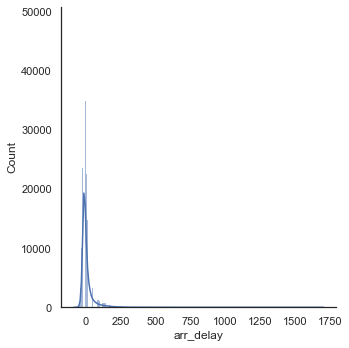

In [129]:
sns.displot(data=fw_df, x='arr_delay', kde=True)

In [138]:
fw_df[ (fw_df['arr_delay'] > 250) ].mode()['Type_Mode']

0    Rain
Name: Type_Mode, dtype: object

In [139]:
fw_df['Type_Mode'].value_counts()

Rain             990094
Snow             298330
Fog              206913
Cold              12953
Storm              1342
Hail                888
Precipitation        44
Name: Type_Mode, dtype: int64

In [98]:
fw_df[fw_df[['Type_Mode','Severity_Mode']].isna().any(axis=1)].shape[0] # amount of null rows

383493

In [ ]:
# looks lke there is more delays at the end of january - let's dig deeper into this:

In [95]:
fw_df.fl_date.dtypes

dtype('O')

In [96]:
# convert to datetime

In [100]:
fw_df.fl_date = pd.to_datetime(fw_df.fl_date)

In [101]:
fw_df.fl_date.dtypes

dtype('<M8[ns]')

In [105]:
fw_df['flight_week'] = fw_df['fl_date'].dt.week
fw_df['flight_day'] = fw_df['fl_date'].dt.day

C:\Users\furqa\AppData\Local\Temp/ipykernel_2816/2344075630.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  fw_df['flight_week'] = fw_df['fl_date'].dt.week


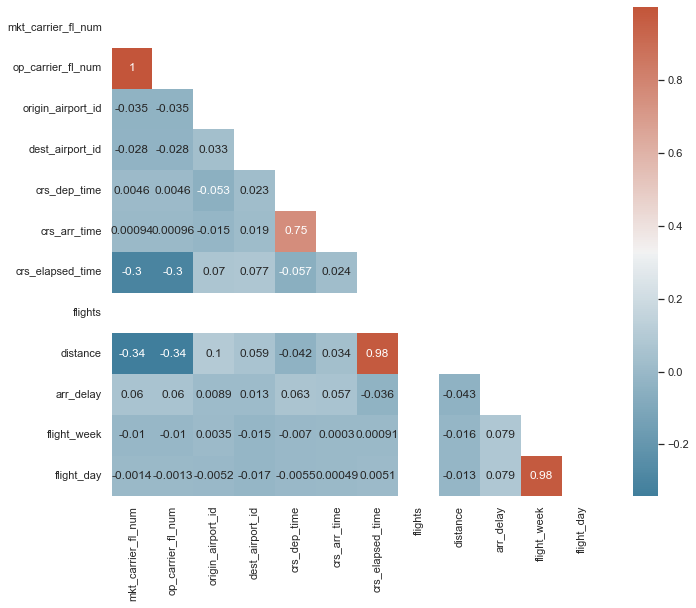

In [120]:
sns.set_theme(style='white')
corrMatrix = fw_df.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corrMatrix,mask=mask, cmap=cmap, annot=True)
plt.show()

In [144]:
fw_df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,Type_Mode,Severity_Mode,flight_week,flight_day
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light,1,3
1,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light,1,3


In [146]:
fw_df.origin_city_name.value_counts()

Atlanta, GA        221432
Houston, TX        108947
Los Angeles, CA     96202
New York, NY        78617
Chicago, IL         73169
                    ...  
St. Cloud, MN          18
Owensboro, KY          13
Pago Pago, TT          11
Adak Island, AK         9
Ogden, UT               8
Name: origin_city_name, Length: 354, dtype: int64

#### First Dropped Batch

In [166]:
dfi1 = fw_df.copy()

In [167]:
dfi1.head(1)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,Type_Mode,Severity_Mode,flight_week,flight_day
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,"Stillwater, OK",11298,DFW,"Dallas/Fort Worth, TX",1152,1304,N,72.0,1.0,225.0,NaN,Rain,Light,1,3


In [173]:
dfi1 = dfi1.dropna(subset=['Type_Mode','Severity_Mode'])

In [182]:
dfi1 = dfi1.dropna(subset=['arr_delay'])

In [187]:
dfi1.shape

(1447055, 25)

In [200]:
dfi1 = dfi1.drop(['branded_code_share', 'mkt_carrier',
           'mkt_carrier_fl_num',
           'op_unique_carrier',
           'tail_num',
           'op_carrier_fl_num',
           'origin_airport_id',
           'origin',
           'dest_airport_id',
           'dest',
           'dup',
           'flights',
          ],axis=1)

In [214]:
dfi1

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,Type_Mode,Severity_Mode,flight_week,flight_day
15,2019-01-01,AA,"Myrtle Beach, SC","Charlotte, NC",2157,2311,74.0,157.0,-3.0,Fog,Severe,1,1
16,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
17,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
18,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
19,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894014,2019-01-28,WN,"Detroit, MI","Chicago, IL",610,640,90.0,228.0,-7.0,Snow,Light,5,28
1894015,2019-01-28,WN,"Detroit, MI","Chicago, IL",610,640,90.0,228.0,-7.0,Snow,Light,5,28
1894016,2019-01-28,WN,"Detroit, MI","Chicago, IL",610,640,90.0,228.0,-7.0,Snow,Light,5,28
1894017,2019-01-28,WN,"Detroit, MI","Chicago, IL",610,640,90.0,228.0,-7.0,Snow,Light,5,28


In [209]:
dfi1.to_csv('before_encode_df.csv')

In [194]:
# only for first week of jan

In [193]:
w1_df = dfi1[(dfi1['fl_date'] >= '2019-01-01') & (dfi1['fl_date'] <='2019-01-07')]

In [196]:
w1_df = w1_df.drop(['branded_code_share', 'mkt_carrier',
           'mkt_carrier_fl_num',
           'op_unique_carrier',
           'tail_num',
           'op_carrier_fl_num',
           'origin_airport_id',
           'origin',
           'dest_airport_id',
           'dest',
           'dup',
           'flights',
          ],axis=1)

In [197]:
w1_df

,fl_date,mkt_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,Type_Mode,Severity_Mode,flight_week,flight_day
15,2019-01-01,AA,"Myrtle Beach, SC","Charlotte, NC",2157,2311,74.0,157.0,-3.0,Fog,Severe,1,1
16,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
17,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
18,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
19,2019-01-01,AA,"Hartford, CT","Washington, DC",1151,1325,94.0,313.0,6.0,Rain,Light,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528363,2019-01-07,B6,"Salt Lake City, UT","Long Beach, CA",1857,1950,113.0,588.0,-8.0,Rain,Light,2,7
528364,2019-01-07,B6,"Long Beach, CA","Salt Lake City, UT",1533,1816,103.0,588.0,6.0,Rain,Light,2,7
528365,2019-01-07,B6,"Long Beach, CA","Salt Lake City, UT",1533,1816,103.0,588.0,6.0,Rain,Light,2,7
528367,2019-01-07,B6,"San Francisco, CA","Boston, MA",1402,2230,328.0,2704.0,-25.0,Rain,Light,2,7


In [185]:
dfi1.Type_Mode.value_counts()

Rain             960553
Snow             269157
Fog              202547
Cold              12597
Storm              1283
Hail                874
Precipitation        44
Name: Type_Mode, dtype: int64

In [186]:
dfi1.Severity_Mode.value_counts()

Light       1255985
Severe        96072
Moderate      93995
Other           804
Heavy           199
Name: Severity_Mode, dtype: int64

In [189]:
dfi1.origin_airport_id.value_counts()

10397    204724
12892     84402
12266     72881
11433     61276
14747     58650
          ...  
14905        27
12544        25
12119        21
13983        10
12177         7
Name: origin_airport_id, Length: 233, dtype: int64

In [170]:
dfi1.origin_city_name.value_counts()

Atlanta, GA        221432
Houston, TX        108947
Los Angeles, CA     96202
New York, NY        78617
Chicago, IL         73169
                    ...  
St. Cloud, MN          18
Owensboro, KY          13
Pago Pago, TT          11
Adak Island, AK         9
Ogden, UT               8
Name: origin_city_name, Length: 354, dtype: int64

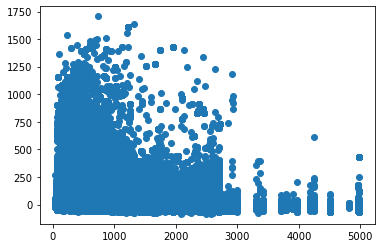

In [59]:
plt.scatter(fw_df['distance'].values,fw_df['arr_delay'].values)
plt.show()